# Explore 2020 Candidate Tweets for Practice Presentation
This notebook goes through exploration of 2020 candidate tweets so that content is available for project practice presentation 4/28/2020.

In [26]:
import bz2
import json
import time
from datetime import datetime
import collections
import pandas as pd
import numpy as np
import re
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
def get_date(created_at):
    """Function to convert Twitter created_at to date format
    Argument:
        created_at {[str]} -- [raw tweet creation date time stamp]
    Returns:
        [str] -- [date e.g. '2020-04-18']
    """
    return time.strftime('%Y-%m-%d', time.strptime(created_at, '%a %b %d %H:%M:%S +0000 %Y'))

def get_date_time(tweetdate):
    """Function to convert twitter date to date time object
    
    Arguments:
        tweetdate {[str]} -- [twitter created at date]
    
    Returns:
        [datetime.datetime] -- [date time object]
    """
    ts = time.strftime(
        '%Y-%m-%d %H:%M:%S',
        time.strptime(tweetdate, '%a %b %d %H:%M:%S +0000 %Y')
    )
    dt = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
    return dt

def clean_tweet(tweet):
    """Utility function to clean tweet text by removing links
    , hashtags, @mentions, and numbers
        using simple regex statements. Converts text to lowercase
    
    Arguments:
        tweet {[str]} -- [tweet text]
    
    Returns:
        [str] -- [clean tweet text]
    """    
    # remove links, hashtags, mentions, convert to lowercase
    pattern = re.compile("(\\w+:\\/\\/\\S+)|(#[A-Za-z0-9]+)|(@[A-Za-z]+[A-Za-z0-9-_]+)")
    tweet = re.sub(pattern, ' ', tweet).lower() 
    # remove numbers
    words = tweet.split()
    reformed = [word for word in words if not re.match('\\d', word)]
    tweet = ' '.join(reformed)
    out = ' '.join(tweet.split())
    return out

## Read 2020 Candidate Tweets

In [3]:
fname = "data/2020_candidate_tweets.json"
with bz2.BZ2File(fname, 'r') as fin:
  data = json.loads(fin.read().decode('utf-8'))

In [4]:
print("Tweets collected from {:d} candidates".format(len(data)))

Tweets collected from 33 candidates


## Number of Tweets and Timeframe of Tweets by User

In [5]:
for user in data.keys():
    tweets = data[user]
    datelist = [get_date(tweet['created_at']) for tweet in tweets]
    start = min(datelist)
    end = max(datelist)
    #print(user, len(data[user]), "from: {:s} to: {:s}".format(start, end))
    print("User: {:s} | Number of tweets: {:d} | from: {:s} to: {:s}".format(user, len(data[user]), start, end))

User: amyklobuchar | Number of tweets: 3239 | from: 2019-02-18 to: 2020-04-18
User: AndrewYang | Number of tweets: 3215 | from: 2020-01-06 to: 2020-04-18
User: BernieSanders | Number of tweets: 3238 | from: 2019-09-07 to: 2020-04-18
User: BetoORourke | Number of tweets: 3228 | from: 2018-11-06 to: 2020-04-18
User: BilldeBlasio | Number of tweets: 2159 | from: 2016-10-19 to: 2020-03-12
User: GovBillWeld | Number of tweets: 1002 | from: 2019-02-14 to: 2020-03-23
User: CoryBooker | Number of tweets: 3230 | from: 2018-10-12 to: 2020-04-18
User: DevalPatrick | Number of tweets: 2032 | from: 2011-03-25 to: 2020-03-07
User: realDonaldTrump | Number of tweets: 3222 | from: 2019-12-31 to: 2020-04-18
User: ewarren | Number of tweets: 3210 | from: 2019-10-08 to: 2020-04-18
User: ericswalwell | Number of tweets: 3239 | from: 2018-07-30 to: 2020-04-16
User: JayInslee | Number of tweets: 3206 | from: 2019-05-04 to: 2020-04-17
User: JoeSestak | Number of tweets: 3189 | from: 2015-07-17 to: 2020-02-15

## The List of All Tweets

In [6]:
tweetslist = [tweet for user in data for tweet in data[user]]
print("A total of {:d} tweets were collected".format(len(tweetslist)))

A total of 97316 tweets were collected


## Plot of Tweet Times
Tweet date times are in GMT (Greenwich Mean Time) (7 hours ahead of PST | 4 hours ahead of EST)

In [7]:
dtlist = [get_date_time(tweet['created_at']) for tweet in tweetslist]

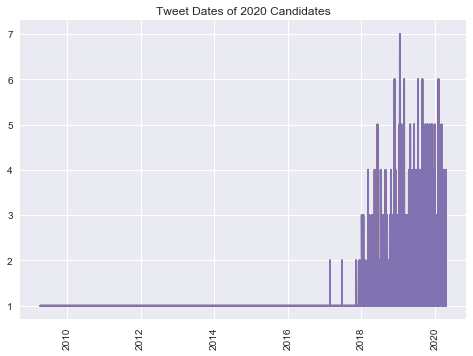

In [25]:
X,Y = np.unique(dtlist, return_counts=True)
plt.plot(X, Y)
plt.xticks(rotation=90)
plt.title("Tweet Dates of 2020 Candidates")
#plt.savefig('plt_tweet_time.png', bbox_inches = 'tight')

plt.show()

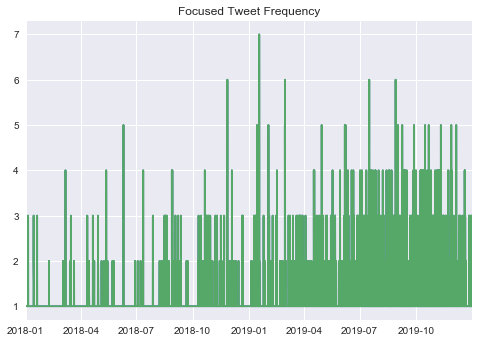

In [61]:
plt.plot(X,Y)
plt.xlim(xmin = datetime(2018,1,1, hour=0), xmax = datetime(2019,12,31, hour=23))
plt.title("Focused Tweet Frequency")

plt.show()

## Plot of Top 10 Candidates by Number of Tweets

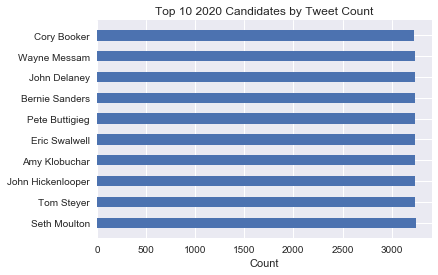

In [65]:
%matplotlib inline
userlist = [tweet['user']['name'] for tweet in tweetslist]
counter = collections.Counter(userlist)
top10users = counter.most_common(10)
labels, values = zip(*top10users)
indexes = np.arange(len(labels))
width = 0.5 
plt.barh(indexes, values, width)
plt.yticks(indexes, labels)
plt.xlabel('Count')
plt.title("Top 10 2020 Candidates by Tweet Count")
#plt.savefig('plt_top_users.png', bbox_inches = 'tight')

## Plot all Candidates for Presentation

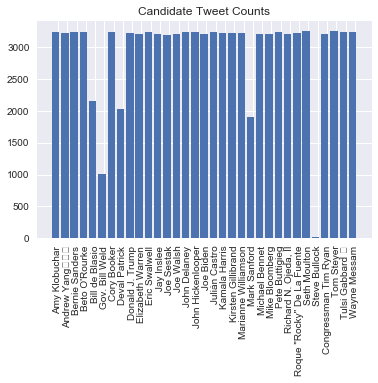

In [84]:
userlist = [tweet['user']['name'] for tweet in tweetslist]
counter = collections.Counter(userlist)
labels, values = zip(*counter.items())
indexes = np.arange(len(labels))
plt.bar(indexes, values)
plt.xticks(indexes + width * 0.5, labels)
plt.xticks(rotation=90)
#plt.yticks(indexes, labels)
#plt.xlabel('Count')
plt.title("Candidate Tweet Counts")

## Plot of Retweet Counts

The average retweet count is 1346.23
The median retweet count is 75.00


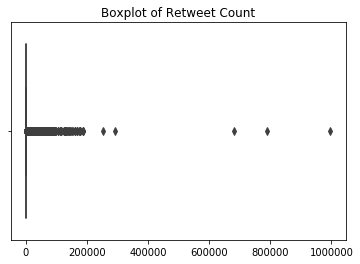

In [43]:
rtlist = [tweet['retweet_count'] for tweet in tweetslist]
fig, ax = plt.subplots()
sns.boxplot(rtlist, ax=ax).set_title("Boxplot of Retweet Count")
#plt.savefig('plt_rt_counts.png', bbox_inches = 'tight')
print("The average retweet count is {:.2f}".format(np.mean(rtlist)))
print("The median retweet count is {:.2f}".format(np.median(rtlist)))

## Plot of Languages Present in Tweets

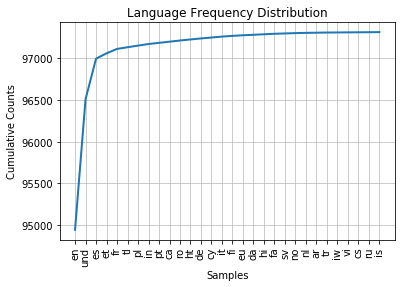

In [44]:
languagelist = [tweet['lang'] for tweet in tweetslist]
FreqDist(languagelist).plot(100, cumulative = True, title = 'Language Frequency Distribution')

## Cleaned Language List

In [38]:
stop_words = set(stopwords.words('english'))
tweettexts = [clean_tweet(tweet['text']) for tweet in tweetslist] # list of strings of tweets
tweetdocs = [word_tokenize(tt) for tt in tweettexts] # tokenized tweets

## Corpus Statistics

In [39]:
# tweet statistics
print("tweet level statistics:\n")
# average number of characters per tweet
avg_chars = int(sum([len(t) for t in tweettexts]) / len(tweettexts))
print("Average number of characters per tweet: {:d}".format(avg_chars))
# average number of words per tweet
avg_words = int(sum([len(doc) for doc in tweetdocs]) / len(tweetdocs))
print("Average number of words per tweet: {:d}".format(avg_words))
# average vocabulary size per tweet
avg_vocab = int(sum([len(set(doc)) for doc in tweetdocs]) / len(tweetdocs))
print("Average vocabulary size per tweet: {:d}".format(avg_vocab))
# average lexical richness per tweet (proportion of unique words to total words)
avg_lex_rich = sum([len(set(doc))/len(doc) for doc in tweetdocs if len(doc) > 0]) / len(tweetdocs)
print("Average lexical richness per tweet: {:.2f}".format(avg_lex_rich))

tweet level statistics:

Average number of characters per tweet: 95
Average number of words per tweet: 19
Average vocabulary size per tweet: 17
Average lexical richness per tweet: 0.92


In [40]:
# corpus statistics
print("\nCorpus level statistics:\n")
words = []
for doc in tweetdocs:
    words.extend(doc)
# total number of words
print("Total number of words: {:d}".format(len(words)))
# vocabulary size
print("Total vocabulary size: {:d}".format(len(set(words))))
# lexical richness
print("Total lexical richness: {:.2f}".format(len(set(words)) / len(words)))
# average number of characters per word
word_lengths = [len(w) for w in words]
print("Average number of characters per word: {:.2f}".format(sum(word_lengths) / len(word_lengths)))


Corpus level statistics:

Total number of words: 1855011
Total vocabulary size: 53988
Total lexical richness: 0.03
Average number of characters per word: 4.15


In [51]:
#removing stopwords and punctuation
filtered_words = [w for w in words if w.isalpha() if not w in stop_words]

## Term Frequency

In [52]:
# Frequency distributions
fdist = FreqDist(filtered_words)
print("Top 50 Most Common Words:")
print(fdist.most_common(50))

Top 50 Most Common Words:
[('rt', 20781), ('trump', 6035), ('people', 5734), ('president', 5051), ('amp', 5040), ('need', 4585), ('today', 4576), ('new', 4154), ('us', 4047), ('one', 3955), ('thank', 3738), ('time', 3383), ('country', 3160), ('make', 2947), ('great', 2872), ('like', 2758), ('get', 2750), ('climate', 2709), ('every', 2707), ('day', 2658), ('health', 2522), ('must', 2507), ('american', 2362), ('right', 2357), ('care', 2255), ('campaign', 2234), ('first', 2183), ('america', 2180), ('change', 2166), ('americans', 2116), ('would', 2087), ('know', 2084), ('thanks', 2064), ('work', 2034), ('plan', 1991), ('going', 1972), ('iowa', 1926), ('support', 1902), ('donald', 1885), ('take', 1865), ('state', 1848), ('years', 1840), ('see', 1826), ('want', 1818), ('fight', 1817), ('help', 1792), ('last', 1786), ('many', 1773), ('candidate', 1713), ('good', 1631)]


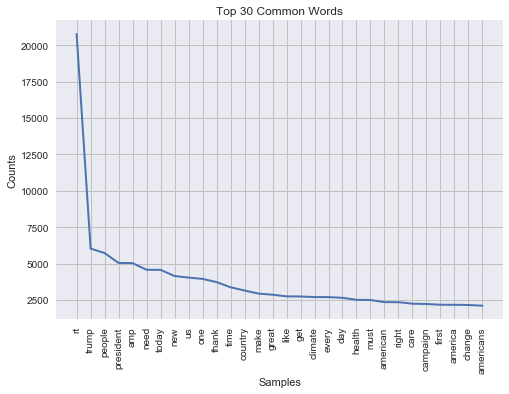

In [53]:
# plot frequency distribution
fdist.plot(30, title = 'Top 30 Common Words')

## Sentiment Polarity

In [53]:
from textblob import TextBlob
scorelist = [TextBlob(tweet).sentiment.polarity for tweet in tweettexts]

count    97316.000000
mean         0.123588
std          0.286321
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
dtype: float64


Text(0.5, 1.0, 'Boxplot of Polarity (TextBlob)')

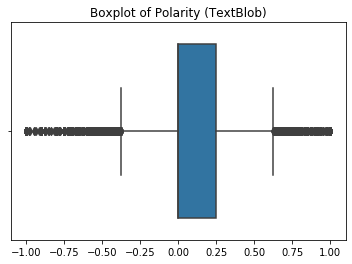

In [54]:
# plot polarity distribution / center
print(pd.Series(scorelist).describe())
fig, ax = plt.subplots()
sns.boxplot(scorelist, ax=ax).set_title("Boxplot of Polarity (TextBlob)")
#plt.savefig('plt_textblob_polarity.png', bbox_inches = 'tight')

## Sentiment Label Frequency

In [59]:
def get_sentiment(score):
    """Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
    
    Arguments:
        scores {[float]} -- [Textblob score]
    
    Returns:
        [str] -- [sentiment label]
    """    
    # set sentiment
    if score > 0:
        return 'pos'
    elif score == 0:
        return 'neu'
    else:
        return 'neg'    

Text(0.5, 1.0, 'Sentiment Frequency')

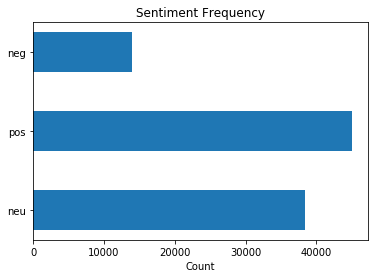

In [60]:
sentlist = [get_sentiment(score) for score in scorelist]
counter = collections.Counter(sentlist)
labels = counter.keys()
values = counter.values()
indexes = np.arange(len(labels))
width = 0.5 
plt.barh(indexes, values, width)
plt.yticks(indexes, labels)
plt.xlabel('Count')
plt.title("Sentiment Frequency")